In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.manifold import TSNE

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 1.0, 'Fraud vs Non-fraud cases Count')

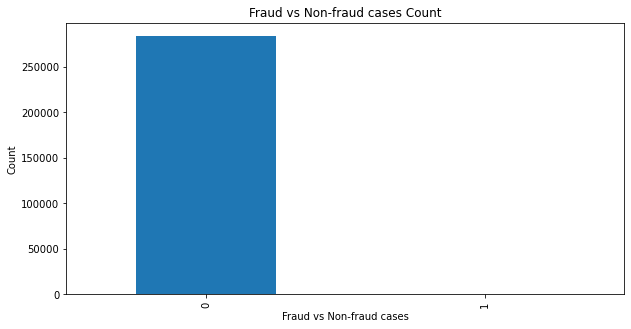

In [8]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(10,5))
ax = dataset.Class.value_counts().plot(kind = 'bar')
plt.xlabel("Fraud vs Non-fraud cases")
plt.ylabel("Count")
plt.title("Fraud vs Non-fraud cases Count")

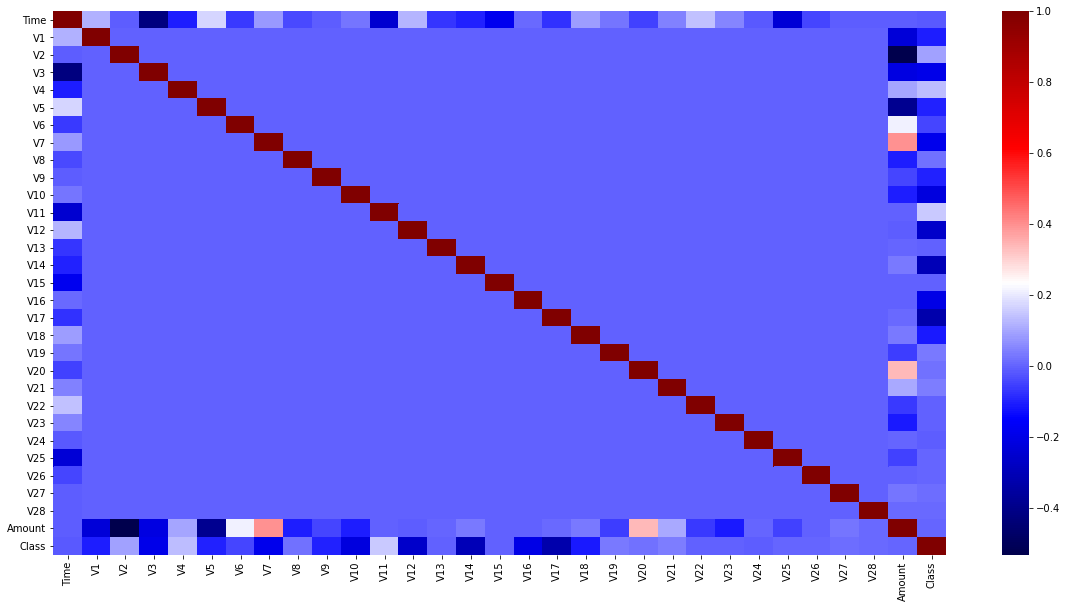

In [9]:
# Heatmap to find any high correlations
plt.figure(figsize=(20,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show()

1. The data set is very imbalanced with only 492 Fraud records and 284315 Non-fraud records.
2. The dataset consists of numerical values from V1 to V28, which looks transformed from real data.
3. But 'Time' and 'Amount' features are not transformed. So we need scaling of dataset.
4. There is no missing value/NaNs in the dataset.

Using this data as it is with balancing it might overfit, but for comparison,we will first start with imbalanced data 
and see the results. Then we will balance the data and check the results again.

In [10]:
X = dataset.drop(["Class"], axis = 1)
y = dataset["Class"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
X_trainA = X_train.drop(["Time"], axis = 1)
X_testA = X_test.drop(["Time"], axis = 1)

## Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_trainA)
X_test = sc.transform(X_testA)

In [14]:
print(y_train[y_train.values == 0].shape[0])
print(y_train[y_train.values == 1].shape[0])
print(y_test[y_test.values == 0].shape[0])
print(y_test[y_test.values == 1].shape[0])

199019
345
85296
147


# Create models on unbalanced data

In [15]:
def fit_and_predict(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)
    ypred = classifier.predict(X_testA)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("Accuracy Score:", accuracy_score(y_test, ypred))
    print("Recall Score:", recall_score(y_test, ypred))
    print("Precision Score:", precision_score(y_test, ypred))
    
    test_df = pd.DataFrame(X_test, columns = X.columns[1:])
    test_df['Actual'] = y_test.values
    test_df['Predicted'] = ypred
    test_df.head()
    tp = test_df[(test_df['Actual'] == 1) & (test_df['Predicted'] == 1)].shape[0]
    actual_positive = test_df[(test_df['Actual'] == 1)].shape[0]
    print("True Positives: ", tp)
    print("Accuracy for fraud cases: ", (tp / actual_positive))
    print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
    return roc_curve(y_test, ypred)

### Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_fp, lr_tp, lr_threshold = fit_and_predict(lr, X_trainA, y_train)
print("Threshold:", lr_threshold)

C:\Users\india\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[85285    11]
 [   60    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.59      0.71       147

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.99916903666772
Recall Score: 0.5918367346938775
Precision Score: 0.8877551020408163
True Positives:  87
Accuracy for fraud cases:  0.5918367346938775
ROC AUC Score:  0.7958538860113544
Threshold: [2 1 0]


### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree_fp, dtree_tp, dtree_threshold = fit_and_predict(dtree, X_trainA, y_train)
print("Threshold:", dtree_threshold)

[[85270    26]
 [   36   111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.81      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9992743700478681
Recall Score: 0.7551020408163265
Precision Score: 0.8102189781021898
True Positives:  111
Accuracy for fraud cases:  0.7551020408163265
ROC AUC Score:  0.8773986099786003
Threshold: [2 1 0]


### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_fp, rf_tp, rf_threshold = fit_and_predict(rf, X_trainA, y_train)
print("Threshold:", rf_threshold)

[[85289     7]
 [   34   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9995201479348805
Recall Score: 0.7687074829931972
Precision Score: 0.9416666666666667
True Positives:  113
Accuracy for fraud cases:  0.7687074829931972
ROC AUC Score:  0.8843127079194085
Threshold: [2 1 0]


### Adaboost

In [19]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators = 100, random_state = 42)
adb_fp, adb_tp, adb_threshold = fit_and_predict(adb, X_trainA, y_train)
print("Threshold:", adb_threshold)

[[85279    17]
 [   46   101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.69      0.76       147

    accuracy                           1.00     85443
   macro avg       0.93      0.84      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9992626663389628
Recall Score: 0.6870748299319728
Precision Score: 0.8559322033898306
True Positives:  101
Accuracy for fraud cases:  0.6870748299319728
ROC AUC Score:  0.8434377619928107
Threshold: [2 1 0]


In [20]:
pip install xgboost

### XGBoost

In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42)
xgb_fp, xgb_tp, xgb_threshold = fit_and_predict(xgb, X_trainA, y_train)
print("Threshold:", xgb_threshold)

C:\Users\india\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[85288     8]
 [   32   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.78      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9995318516437859
Recall Score: 0.782312925170068
Precision Score: 0.9349593495934959
True Positives:  115
Accuracy for fraud cases:  0.782312925170068
ROC AUC Score:  0.8911095670682454
Threshold: [2 1 0]


## ROC Curve

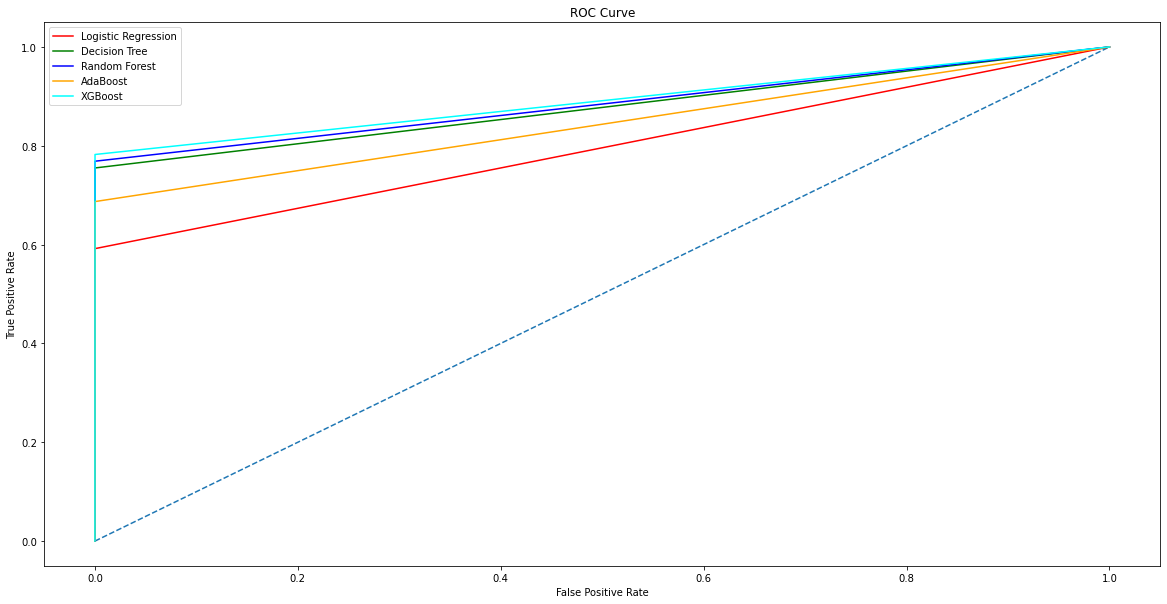

In [22]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Balance Data using oversampling method

In [23]:
print(X_trainA.shape, y_train.shape)
print(X_testA.shape, y_test.shape)

(199364, 29) (199364,)
(85443, 29) (85443,)


In [24]:
X_train1 = X_trainA
X_train1['Class'] = y_train
X_train1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89,0
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98,0
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10,0
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96,0
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95,0


In [25]:
X_train_0_class, X_train_1_class = X_train1.Class.value_counts()
print(X_train_0_class, X_train_1_class)

199019 345


In [26]:
X_train1_0_df = X_train1[X_train1['Class']==0]
X_train1_1_df = X_train1[X_train1['Class']==1]
print(X_train1_0_df.shape, X_train1_1_df.shape)

(199019, 30) (345, 30)


In [27]:
X_train1_1_df = X_train1_1_df.sample(X_train_0_class, replace=True, random_state=0)
print(X_train1_0_df.shape, X_train1_1_df.shape)

(199019, 30) (199019, 30)


In [28]:
X_train1 = pd.concat([X_train1_0_df, X_train1_1_df])
X_train1.shape

(398038, 30)

In [29]:
print(X_train1[X_train1['Class']==0].shape)
print(X_train1[X_train1['Class']==1].shape)

(199019, 30)
(199019, 30)


In [30]:
X_trainB = X_train1.drop("Class", axis =1)
y_trainB = X_train1["Class"]

In [31]:
print(X_trainB.shape, y_trainB.shape)
print(X_testA.shape, y_test.shape)

(398038, 29) (398038,)
(85443, 29) (85443,)


# Create models on Balanced Data

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_fp, lr_tp, lr_threshold = fit_and_predict(lr, X_trainB, y_trainB)
print("Threshold:", lr_threshold)

C:\Users\india\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[83123  2173]
 [   13   134]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.91      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Accuracy Score: 0.9744156923329003
Recall Score: 0.9115646258503401
Precision Score: 0.05808409189423494
True Positives:  134
Accuracy for fraud cases:  0.9115646258503401
ROC AUC Score:  0.943044318177468
Threshold: [2 1 0]


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree_fp, dtree_tp, dtree_threshold = fit_and_predict(dtree, X_trainB, y_trainB)
print("Threshold:", dtree_threshold)

[[85268    28]
 [   43   104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.71      0.75       147

    accuracy                           1.00     85443
   macro avg       0.89      0.85      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.99916903666772
Recall Score: 0.7074829931972789
Precision Score: 0.7878787878787878
True Positives:  104
Accuracy for fraud cases:  0.7074829931972789
ROC AUC Score:  0.8535773622898793
Threshold: [2 1 0]


### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_fp, rf_tp, rf_threshold = fit_and_predict(rf, X_trainB, y_trainB)
print("Threshold:", rf_threshold)

[[85290     6]
 [   33   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.78      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9995435553526912
Recall Score: 0.7755102040816326
Precision Score: 0.95
True Positives:  114
Accuracy for fraud cases:  0.7755102040816326
ROC AUC Score:  0.8877199304032249
Threshold: [2 1 0]


### Adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators = 100, random_state = 0)
adb_fp, adb_tp, adb_threshold = fit_and_predict(adb, X_trainB, y_trainB)
print("Threshold:", adb_threshold)

[[84726   570]
 [   20   127]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.18      0.86      0.30       147

    accuracy                           0.99     85443
   macro avg       0.59      0.93      0.65     85443
weighted avg       1.00      0.99      1.00     85443

Accuracy Score: 0.9930948117458422
Recall Score: 0.8639455782312925
Precision Score: 0.18220946915351507
True Positives:  127
Accuracy for fraud cases:  0.8639455782312925
ROC AUC Score:  0.9286314835444588
Threshold: [2 1 0]


### XGBoost

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 0)
xgb_fp, xgb_tp, xgb_threshold = fit_and_predict(xgb, X_trainB, y_trainB)
print("Threshold:", xgb_threshold)

C:\Users\india\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[85285    11]
 [   25   122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.92      0.83      0.87       147

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9995786664794073
Recall Score: 0.8299319727891157
Precision Score: 0.9172932330827067
True Positives:  122
Accuracy for fraud cases:  0.8299319727891157
ROC AUC Score:  0.9149015050589735
Threshold: [2 1 0]


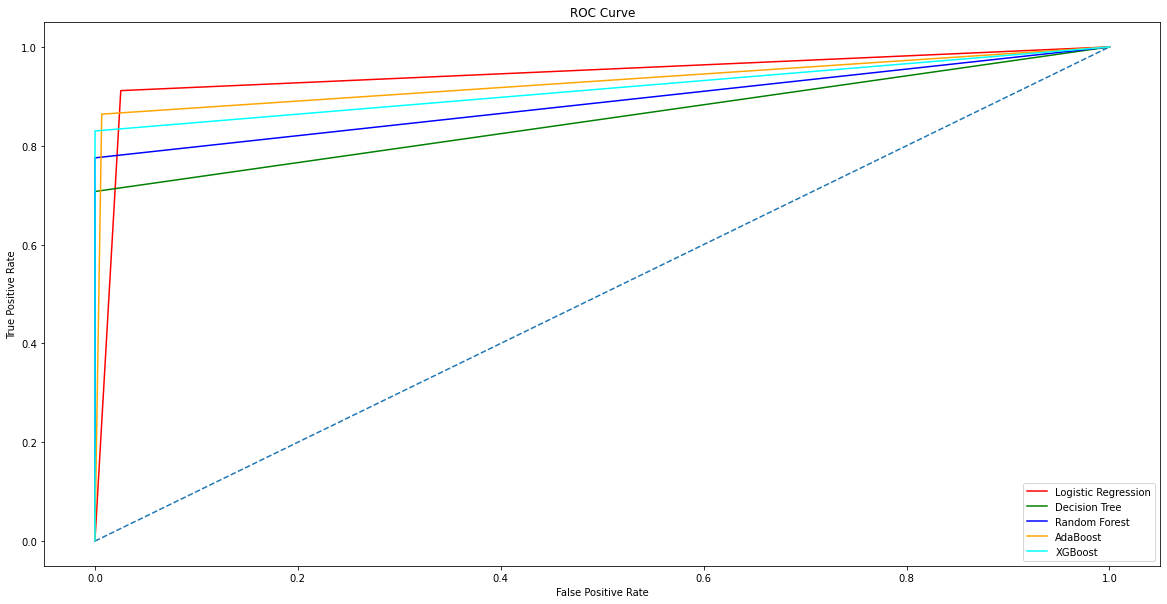

In [37]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Using Neural Networks

In [38]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install tensorflow

In [40]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [41]:
classifier = Sequential()
classifier.add(Dense(units=16, activation="relu", input_dim=29))
classifier.add(Dense(units=2, activation="softmax"))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 514
Trainable params: 514
Non-trainable params: 0
_________________________________________________________________


In [42]:
classifier.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [43]:
classifier.fit(X_trainB, y_trainB, batch_size=10, epochs=20)

Epoch 1/20
39804/39804 [==============================] - 107s 3ms/step - loss: 0.0969 - accuracy: 0.9729
Epoch 2/20
39804/39804 [==============================] - 106s 3ms/step - loss: 0.0301 - accuracy: 0.9920
Epoch 3/20
39804/39804 [==============================] - 106s 3ms/step - loss: 0.0201 - accuracy: 0.9942
Epoch 4/20
39804/39804 [==============================] - 109s 3ms/step - loss: 0.0164 - accuracy: 0.9956
Epoch 5/20
39804/39804 [==============================] - 88s 2ms/step - loss: 0.0138 - accuracy: 0.9966
Epoch 6/20
39804/39804 [==============================] - 63s 2ms/step - loss: 0.0124 - accuracy: 0.9970
Epoch 7/20
39804/39804 [==============================] - 59s 1ms/step - loss: 0.0114 - accuracy: 0.9973
Epoch 8/20
39804/39804 [==============================] - 65s 2ms/step - loss: 0.0098 - accuracy: 0.9977
Epoch 9/20
39804/39804 [==============================] - 63s 2ms/step - loss: 0.0105 - accuracy: 0.9976
Epoch 10/20
39804/39804 [==========================

In [51]:
classifier.evaluate(X_testA, y_test)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0304 - accuracy: 0.9952


[0.030429886654019356, 0.9952365756034851]

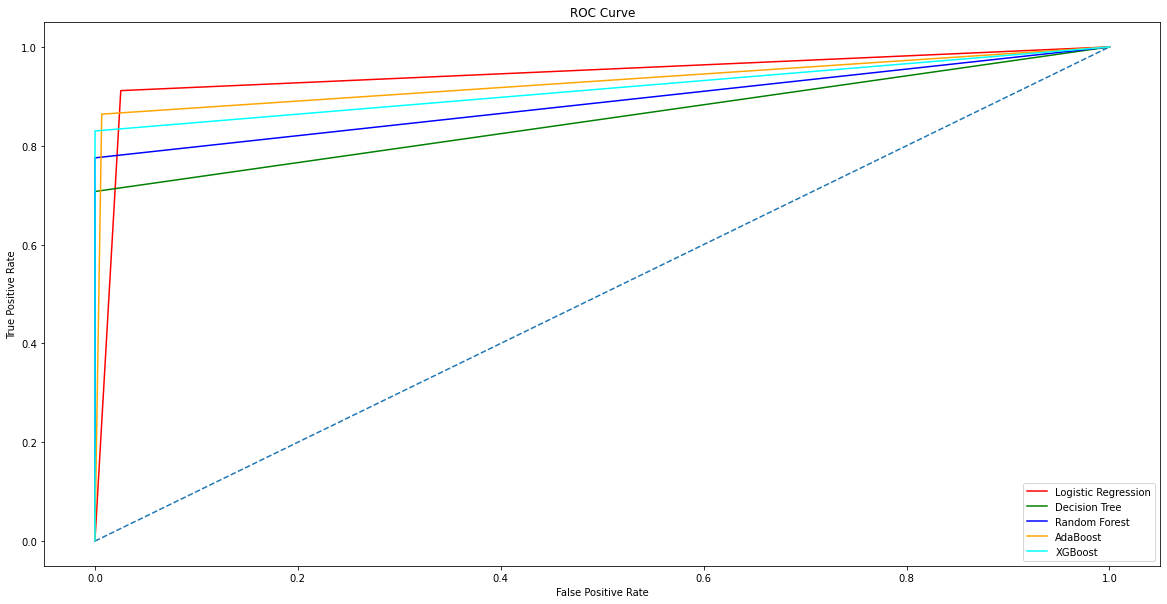

In [54]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

For fraud cases the winner is Logistic Regression with 91% accuracy on Fraud Cases. But logistic regression is giving more False Positives.
Both Boosting models - Adaboost and XGBoost are next considerations but compare to Neural Networks they still have more False Positives. So its a choice between XGboost and Neural Networks. I am considering XGBoost for its better performance in terms of training and we can play with attributes too for improving precision.

# Get most important features and their contribution in model

In [55]:
feature_importance_df = pd.DataFrame(X_trainB.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
13,V14,0.156286
9,V10,0.154797
11,V12,0.108393
10,V11,0.106673
3,V4,0.105957
16,V17,0.093846
2,V3,0.053013
15,V16,0.024084
6,V7,0.020711
20,V21,0.015721


Text(0.5, 1.0, 'Plot Feature Importances')

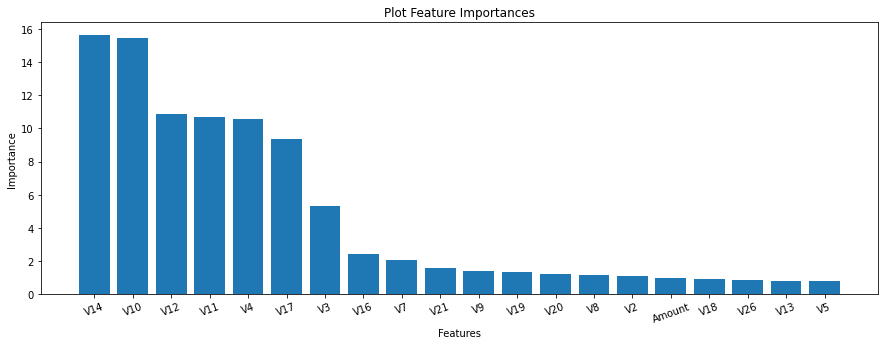

In [56]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

# Conclusion

<p> After investigating and visualizing through the data, we found that the data is unbalanced. So we balanced the data.
After balancing training data, we trainied it and these were the results-<br>
<b>Logistic Regression</b> is giving 97.4% accuracy, 91 % recall and 58% precision. Accuracy for fraud cases is 91% and ROC AUC Score is 94%<br>
<b>Decision Tree</b> is giving 99% accuracy, 70 % recall and 77% precision. Accuracy for fraud cases is 70% and ROC AUC Score is 85%<br>
<b>Random Forest</b> is giving 99% accuracy, 77 % recall and 95% precision. Accuracy for fraud cases is 76% and ROC AUC Score is 88%<br>
<b>AdaBoost</b> is giving 99% accuracy, 86 % recall and 18% precision. Accuracy for fraud cases is 86% and ROC AUC Score is 93%<br>
<b>XGBoost</b> is giving 99% accuracy, 87 % recall and 27% precision. Accuracy for fraud cases is 87% and ROC AUC Score is 93%<br>
<b>Neural Networks</b> is giving 99% accuracy
